In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Datasets/onlinefraud.csv')

In [2]:
df.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
df.head()

,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   index           int64  
 1   step            int64  
 2   type            object 
 3   amount          float64
 4   nameOrig        object 
 5   oldbalanceOrg   float64
 6   newbalanceOrig  float64
 7   nameDest        object 
 8   oldbalanceDest  float64
 9   newbalanceDest  float64
 10  isFraud         int64  
 11  isFlaggedFraud  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 582.5+ MB


In [4]:
df.describe()

,index,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,3.181310e+06,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.836730e+06,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.590655e+06,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.181310e+06,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,4.771964e+06,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,6.362619e+06,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Data Cleaning

In [5]:
df.isnull().sum()

index             0
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No missing values in this dataset.

In [6]:
#Identify duplicates
print(df.duplicated().sum())

#Remove duplicates
df_no_duplicates = df.drop_duplicates()

0


No Dublicates either.

# Data Preprocessing

Removing Outliers:

In [7]:
#Using median calculations and IQR, outliers are identified and these data points should be removed

Q1 = df["amount"].quantile(0.25)
Q3 = df["amount"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[df["amount"].between(lower_bound, upper_bound)]


Q1 = df["oldbalanceOrg"].quantile(0.25)
Q3 = df["oldbalanceOrg"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[df["oldbalanceOrg"].between(lower_bound, upper_bound)]


Q1 = df["newbalanceOrig"].quantile(0.25)
Q3 = df["newbalanceOrig"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[df["newbalanceOrig"].between(lower_bound, upper_bound)]


Q1 = df["oldbalanceDest"].quantile(0.25)
Q3 = df["oldbalanceDest"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[df["oldbalanceDest"].between(lower_bound, upper_bound)]


Q1 = df["newbalanceDest"].quantile(0.25)
Q3 = df["newbalanceDest"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[df["newbalanceDest"].between(lower_bound, upper_bound)]

Encoding categorical variables:

In [8]:
#Extracting first letter code from nameOrig and nameDest
df['nameOrg_code'] = df['nameOrig'].str.extract(r'([A-Za-z])')
df['nameDest_code'] = df['nameDest'].str.extract(r'([A-Za-z])')

#Dropping nameOrig and nameDest columns
df = df.drop('nameOrig', axis=1)
df = df.drop('nameDest', axis=1)

In [9]:
df.head()

,index,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrg_code,nameDest_code
1,1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,C,M
2,2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,C,C
3,3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,C,C
4,4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,C,M
5,5,1,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,0,0,C,M


In [10]:
df.nameOrg_code.value_counts()

nameOrg_code
C    3251409
Name: count, dtype: int64

Since all the rows are same , we will drop this column.

In [11]:
df = df.drop('nameOrg_code', axis=1)

In [12]:
df.nameDest_code.value_counts()

nameDest_code
M    1658239
C    1593170
Name: count, dtype: int64

In [13]:
# Filtering the DataFrame for 'isFraud' == 1
fraud_df = df[df['isFraud'] == 1]

# Printing the unique values of 'nameDest_code'
result = fraud_df['nameDest_code'].unique()

result

array(['C'], dtype=object)

nameDest_code of only type 'C' has fraudulant payments.

In [14]:
df = pd.get_dummies(df, columns=['nameDest_code'])
df.head()

,index,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_code_C,nameDest_code_M
1,1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,True
2,2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,True,False
3,3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,True,False
4,4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,True
5,5,1,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,0,0,False,True


In [15]:
df = df.drop('nameDest_code_M', axis=1)

Analaysis of Types in Fradulant payments


In [16]:
print(df["type"].unique())

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [17]:
# Filtering the DataFrame for 'isFraud' == 1
fraud_df2 = df[df['isFraud'] == 1]

# Printing the unique values of 'type'
result = fraud_df2['type'].unique()

result

array(['TRANSFER', 'CASH_OUT'], dtype=object)

Thus only transfer and cash_out have fradulant cases hence removing other three types

In [ ]:
df = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]
df = pd.get_dummies(df, columns=['type'])

In [19]:
df=df.reset_index(drop=True)
df = df.drop('index', axis=1)
df.head()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_code_C,type_CASH_OUT,type_TRANSFER
0,1,181.00,181.00,0.0,0.0,0.00,1,0,True,False,True
1,1,181.00,181.00,0.0,21182.0,0.00,1,0,True,True,False
2,1,229133.94,15325.00,0.0,5083.0,51513.44,0,0,True,True,False
3,1,215310.30,705.00,0.0,22425.0,0.00,0,0,True,False,True
4,1,110414.71,26845.41,0.0,288800.0,2415.16,0,0,True,True,False


In [21]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    1524606
Name: count, dtype: int64

Since all isFlaggedFraud eliminated we will remove this column

In [22]:
df = df.drop('isFlaggedFraud', axis=1)

In [23]:
df['isFraud'] = df['isFraud'].astype(bool)
df['step'] = df['step'].astype(float)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,nameDest_code_C,type_CASH_OUT,type_TRANSFER
0,1.0,181.00,181.00,0.0,0.0,0.00,True,True,False,True
1,1.0,181.00,181.00,0.0,21182.0,0.00,True,True,True,False
2,1.0,229133.94,15325.00,0.0,5083.0,51513.44,False,True,True,False
3,1.0,215310.30,705.00,0.0,22425.0,0.00,False,True,False,True
4,1.0,110414.71,26845.41,0.0,288800.0,2415.16,False,True,True,False





---


Normalizing the values between 0 and 1 :


In [24]:
from sklearn.preprocessing import MinMaxScaler

# numerical columns of float type
numerical_cols = df.select_dtypes(include=['float']).columns

scaler = MinMaxScaler()

# Fit transform selected columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,nameDest_code_C,type_CASH_OUT,type_TRANSFER
0,0.0,0.000361,0.000638,0.0,0.000000,0.000000,True,True,False,True
1,0.0,0.000361,0.000638,0.0,0.012169,0.000000,True,True,True,False
2,0.0,0.456698,0.054043,0.0,0.002920,0.040693,False,True,True,False
3,0.0,0.429146,0.002486,0.0,0.012883,0.000000,False,True,False,True
4,0.0,0.220073,0.094669,0.0,0.165910,0.001908,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
1524601,1.0,0.108931,0.192729,0.0,0.000000,0.043172,True,True,True,False
1524602,1.0,0.514941,0.911075,0.0,0.000000,0.000000,True,True,False,True
1524603,1.0,0.514941,0.911075,0.0,0.014463,0.223973,True,True,True,False
1524604,1.0,0.126400,0.223636,0.0,0.000000,0.000000,True,True,False,True


# Feature Engineering

In [ ]:
!pip install featuretools

In [26]:
import featuretools as ft

In [ ]:
#performing automated feature engineering
es = ft.EntitySet(id = 'fraud_data')
es = es.add_dataframe(dataframe_name = 'fraud_detection', dataframe = df, index = 'index')

feature_matrix, feature_defs = ft.dfs(entityset=es,
                                       target_dataframe_name = 'fraud_detection')


In [30]:
print(feature_matrix.columns)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'nameDest_code_C', 'type_CASH_OUT',
       'type_TRANSFER'],
      dtype='object')


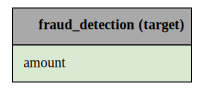

In [31]:
feature = feature_defs[1]
feature
ft.graph_feature(feature)

# Addressing Class Imbalance

In [32]:
!pip install imbalanced-learn==0.10.1

Applying UnderSampling to dataset:

In [33]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [34]:
X = feature_matrix.drop('isFraud', axis=1)
y = feature_matrix['isFraud']

In [35]:
# random undersampling
undersampler = RandomUnderSampler()
X_resampled, y_resampled = undersampler.fit_resample(X, y)

Verifying Result:

In [36]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({False: 1521579, True: 3027})


In [37]:
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({False: 3027, True: 3027})




---
Saving this dataset


In [38]:
resampled_df = pd.DataFrame(X_resampled)
resampled_df['isFraud'] = y_resampled

resampled_df.to_csv('/content/drive/MyDrive/Colab Datasets/resampled_dataset.csv', index=False)

# Implementing Classification Algorithms

In [39]:
import pandas as pd
resampled_df = pd.read_csv('/content/drive/MyDrive/Colab Datasets/resampled_dataset.csv')

In [41]:
x = resampled_df.drop('isFraud', axis=1)
y = resampled_df['isFraud']

In [42]:
# @title splitting test and train cases in 20-80 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify=y)

print("Number of cases in x_train:", x_train.shape[0])
print("Number of cases in x_test:", x_test.shape[0])
print("Number of cases in y_train:", y_train.shape[0])
print("Number of cases in y_test:", y_test.shape[0])

Number of cases in x_train: 4843
Number of cases in x_test: 1211
Number of cases in y_train: 4843
Number of cases in y_test: 1211


No of Cases Split



---



In [44]:
# @title Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logi = LogisticRegression()
logi.fit(x_train, y_train)

logi_pred = logi.predict(x_test)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logi_pred,target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.95      0.94      0.95       606
       Fraud       0.94      0.96      0.95       605

    accuracy                           0.95      1211
   macro avg       0.95      0.95      0.95      1211
weighted avg       0.95      0.95      0.95      1211



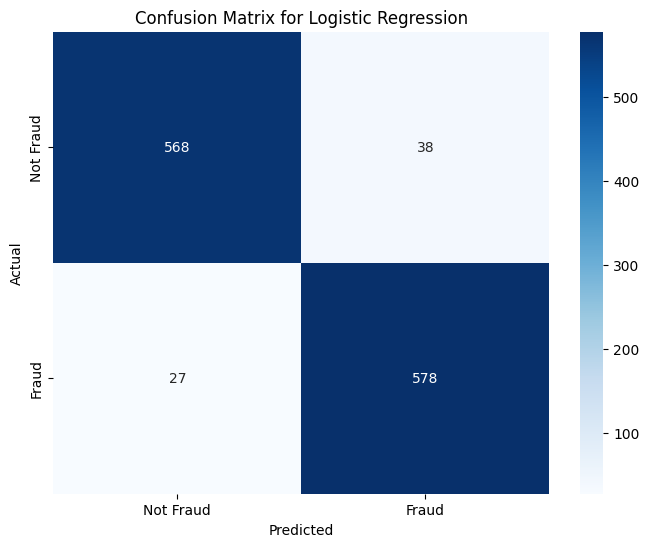

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generating confusion matrix
cm = confusion_matrix(y_test, logi_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

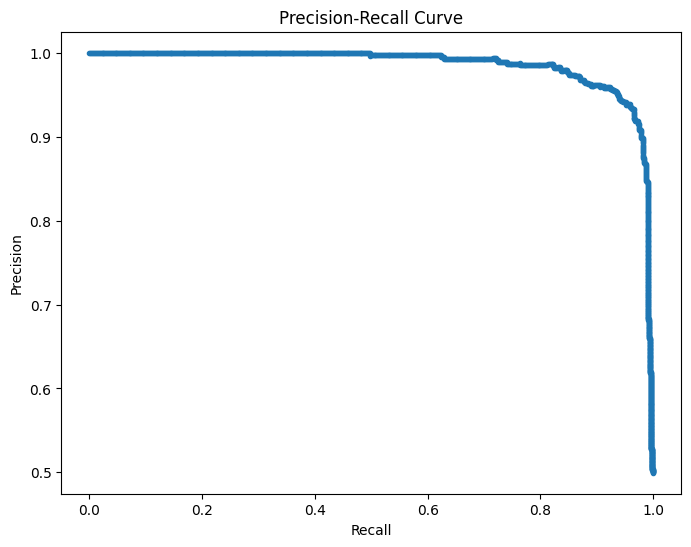

In [48]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
proba_pred = logi.predict_proba(x_test)[:, 1]

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, proba_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

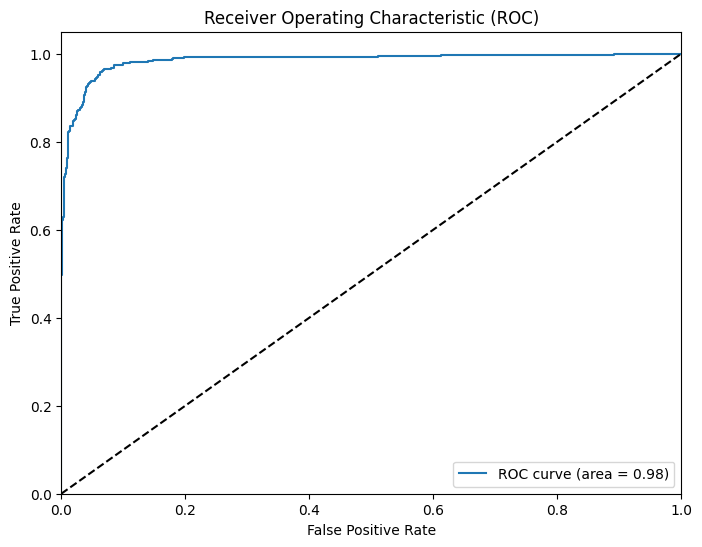

In [49]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, proba_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [50]:
# Print AUC score
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9842129667512206


In [51]:
# @title Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

# Generate classification report
print(classification_report(y_test, rf_pred, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.99      0.98      0.98       606
       Fraud       0.98      0.99      0.98       605

    accuracy                           0.98      1211
   macro avg       0.98      0.98      0.98      1211
weighted avg       0.98      0.98      0.98      1211



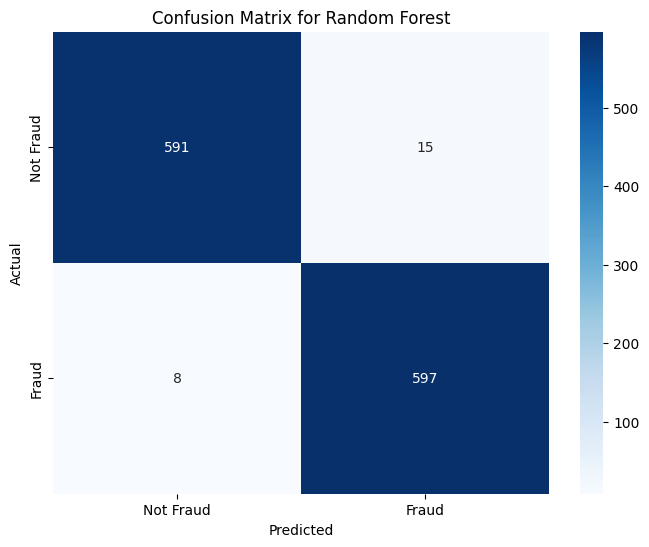

In [56]:
# Generating confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

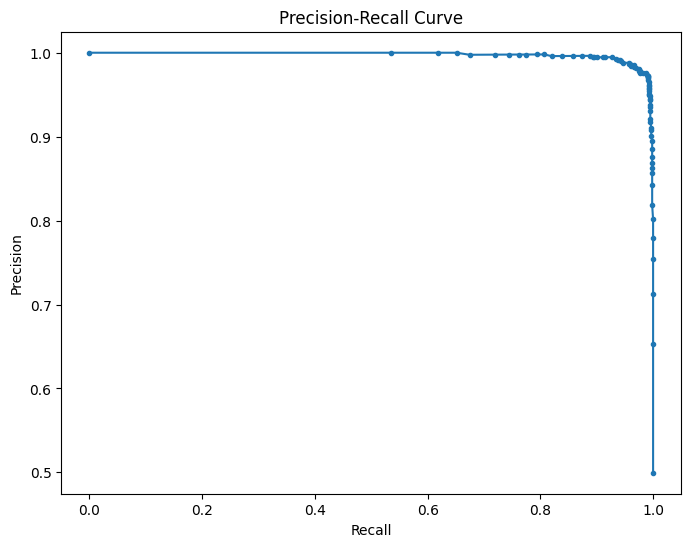

In [57]:
# Get predicted probabilities for the positive class
proba_pred = rf.predict_proba(x_test)[:, 1]

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, proba_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

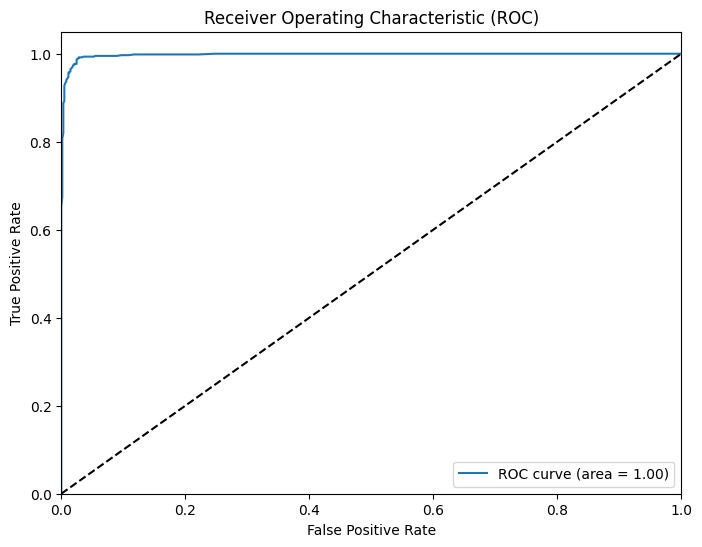

In [58]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, proba_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [59]:
# Print AUC score
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9974592913836838


In [ ]:
# @title XGBoost
!pip install --upgrade xgboost

In [62]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)
print(classification_report(y_test, xgb_pred, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.99      0.98      0.99       606
       Fraud       0.98      0.99      0.99       605

    accuracy                           0.99      1211
   macro avg       0.99      0.99      0.99      1211
weighted avg       0.99      0.99      0.99      1211



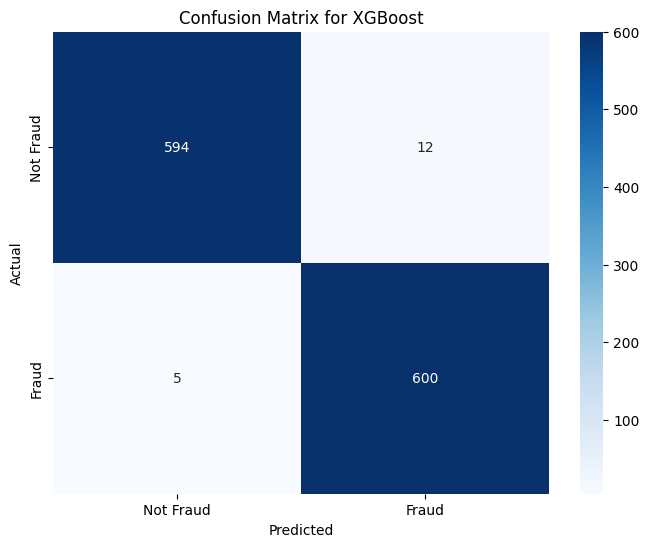

In [63]:
# Generating confusion matrix
cm = confusion_matrix(y_test, xgb_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()

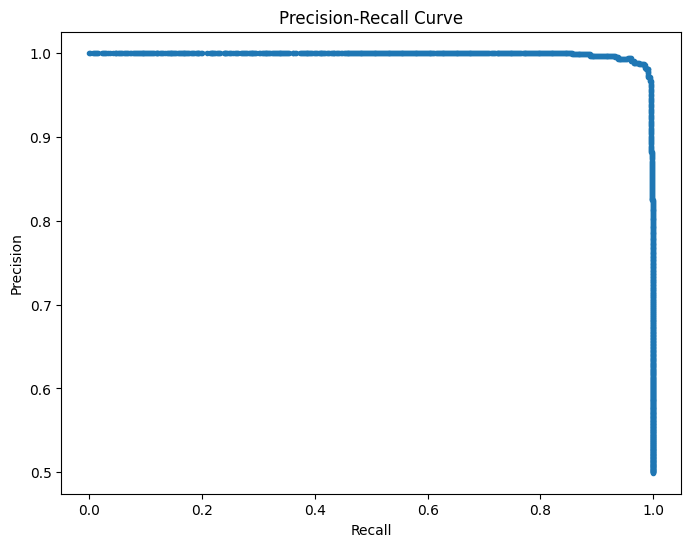

In [64]:
# Get predicted probabilities for the positive class
proba_pred = xgb_model.predict_proba(x_test)[:, 1]

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, proba_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

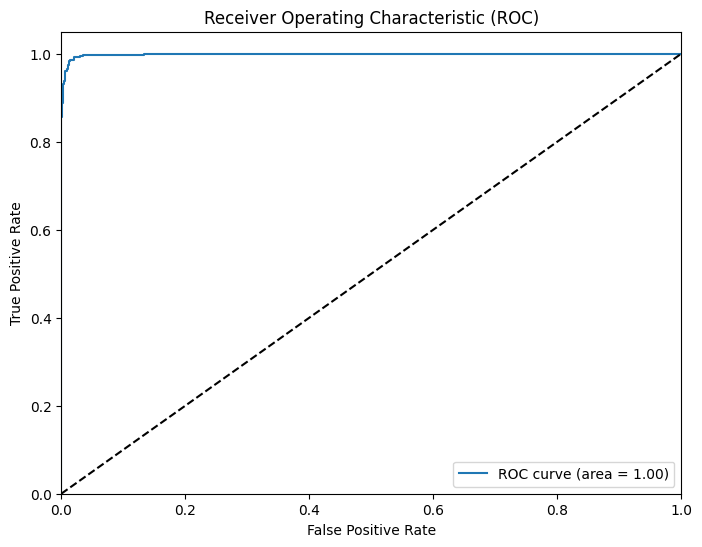

In [65]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, proba_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [66]:
# Print AUC score
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9984698469846985


**Thus we observe that Both random forest and XGBoost give Score very close to 1. Thus we can safely say that both are pretty accurate.
  XGBoost has the highest score hence we will consider it!**



---

